In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

#Fungsi aktivasi sigmoid
def activation(n,deriv=False):
    if deriv == True:
        return n*(1-n)
    else:
        return 1/(1+np.exp(-n))

In [2]:
#Testing (Vallidasi)

data_testing = pd.read_excel("D:\Python\Data Testing.xlsx")
#Get HS, FF, DD
new_data_testing = data_testing.iloc[:,1:4]
#SaveData
new_data_testing.to_excel("D:\Python\Data Test Input.xlsx",index = False)

In [3]:
#Normalize
data_nrml_test = new_data_testing
for i in range(data_nrml_test.shape[1]):
    dataArray = np.array(data_nrml_test.iloc[:,i])
    dataMax = np.amax(dataArray)
    dataMin = 0
    Nrml = (0.8*(dataArray-dataMin)/(dataMax-dataMin))+0.1 #rentang data [0.1 - 0.9]
    data_nrml_test.iloc[:,i] = pd.DataFrame(Nrml)
data_nrml_test.head()
data_nrml_test.to_excel("D:\Python\Data Test Input_Normalisasi.xlsx",index = False)

In [4]:
#Arsitektur
# 21 - 11 - 7 
Input_Size = 21 #7 HS, 7 FF, 7 DD
Hidden_Size = 11

Output_Size = 7 #7 HS Output (t+1 -> t+7)
#semua data
#Data_Train_Row = data_normalize.shape[0]-int(Input_Size/data_normalize.shape[1])
Data_Train_Row = 100

In [5]:
split_data = []
for i in range(Data_Train_Row):
    split_data1,split_data2,split_data3 = [],[],[]
    split_data1.append(np.array(data_nrml_test.iloc[:,0][i:i+int(Input_Size/data_nrml_test.shape[1])]))
    split_data2.append(np.array(data_nrml_test.iloc[:,1][i:i+int(Input_Size/data_nrml_test.shape[1])]))
    split_data3.append(np.array(data_nrml_test.iloc[:,2][i:i+int(Input_Size/data_nrml_test.shape[1])]))
    split_data1.extend(split_data2)
    split_data1.extend(split_data3)
    lattened_list = [element for sublist in split_data1 for element in sublist]
    split_data.append(lattened_list)
x_train = pd.DataFrame(split_data)

y_split_data = []
for i in range(int(Input_Size/data_nrml_test.shape[1]),Data_Train_Row+int(Input_Size/data_nrml_test.shape[1])):
    split_data1=[]
    split_data1.append(np.array(data_nrml_test.iloc[:,0][i:i+Output_Size]))
    lattened_list = [element for sublist in split_data1 for element in sublist]
    y_split_data.append(lattened_list)
y_train = pd.DataFrame(y_split_data)

In [6]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.434058,0.308402,0.279185,0.305425,0.307358,0.208806,0.284750,0.674136,0.404652,0.524068,...,0.564183,0.409295,0.433664,0.881862,0.896038,0.817467,0.819946,0.841380,0.847020,0.820622
1,0.308402,0.279185,0.305425,0.307358,0.208806,0.284750,0.265268,0.404652,0.524068,0.583662,...,0.409295,0.433664,0.480085,0.896038,0.817467,0.819946,0.841380,0.847020,0.820622,0.842600
2,0.279185,0.305425,0.307358,0.208806,0.284750,0.265268,0.239966,0.524068,0.583662,0.564183,...,0.433664,0.480085,0.467264,0.817467,0.819946,0.841380,0.847020,0.820622,0.842600,0.827072
3,0.305425,0.307358,0.208806,0.284750,0.265268,0.239966,0.241633,0.583662,0.564183,0.409295,...,0.480085,0.467264,0.385266,0.819946,0.841380,0.847020,0.820622,0.842600,0.827072,0.877978
4,0.307358,0.208806,0.284750,0.265268,0.239966,0.241633,0.216117,0.564183,0.409295,0.433664,...,0.467264,0.385266,0.446153,0.841380,0.847020,0.820622,0.842600,0.827072,0.877978,0.129889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.135549,0.141052,0.156065,0.203073,0.167465,0.147125,0.253659,0.342562,0.324255,0.369419,...,0.377735,0.339399,0.450437,0.444227,0.639231,0.542129,0.575668,0.544540,0.525918,0.463669
96,0.141052,0.156065,0.203073,0.167465,0.147125,0.253659,0.221352,0.324255,0.369419,0.330043,...,0.339399,0.450437,0.425475,0.639231,0.542129,0.575668,0.544540,0.525918,0.463669,0.433970
97,0.156065,0.203073,0.167465,0.147125,0.253659,0.221352,0.217764,0.369419,0.330043,0.377735,...,0.450437,0.425475,0.424471,0.542129,0.575668,0.544540,0.525918,0.463669,0.433970,0.435228
98,0.203073,0.167465,0.147125,0.253659,0.221352,0.217764,0.152391,0.330043,0.377735,0.339399,...,0.425475,0.424471,0.418861,0.575668,0.544540,0.525918,0.463669,0.433970,0.435228,0.403282


In [80]:
#drop NaN if exist
for i in range(Output_Size-1):
    x_train.drop(x_train.index[-1], inplace=True)
    y_train.drop(y_train.index[-1], inplace=True)
x_train.to_excel("D:\Python\X_Train_validasi.xlsx",index= False)
y_train.to_excel("D:\Python\Y_Train_validasi.xlsx",index= False)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [81]:
W1_ = pd.read_excel("D:\Python\W1_AfterTrain.xlsx").to_numpy()
W2_ = pd.read_excel("D:\Python\W2_AfterTrain.xlsx").to_numpy()
B1_ = pd.read_excel("D:\Python\B1_AfterTrain.xlsx").to_numpy()
B2_ = pd.read_excel("D:\Python\B2_AfterTrain.xlsx").to_numpy()


In [82]:
#Validasi
Z1_net = np.dot(x_train,W1_)+B1_.T
Z1     = activation(Z1_net)
Y1_net = np.dot(Z1,W2_)+B2_.T
Y1     = activation(Y1_net)

In [83]:
Y1_Test = pd.DataFrame(y_train)
Y1_Train = pd.DataFrame(Y1)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14936\1252543075.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(X_Plot, rotation=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14936\1252543075.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(X_Plot, rotation=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14936\1252543075.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(X_Plot, rotation=0)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_14936\1252543075.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[i].set_xticklabels(X_Plot, rotation=0)
C:\Users\ASUS\AppData\Local\Temp\ipykern

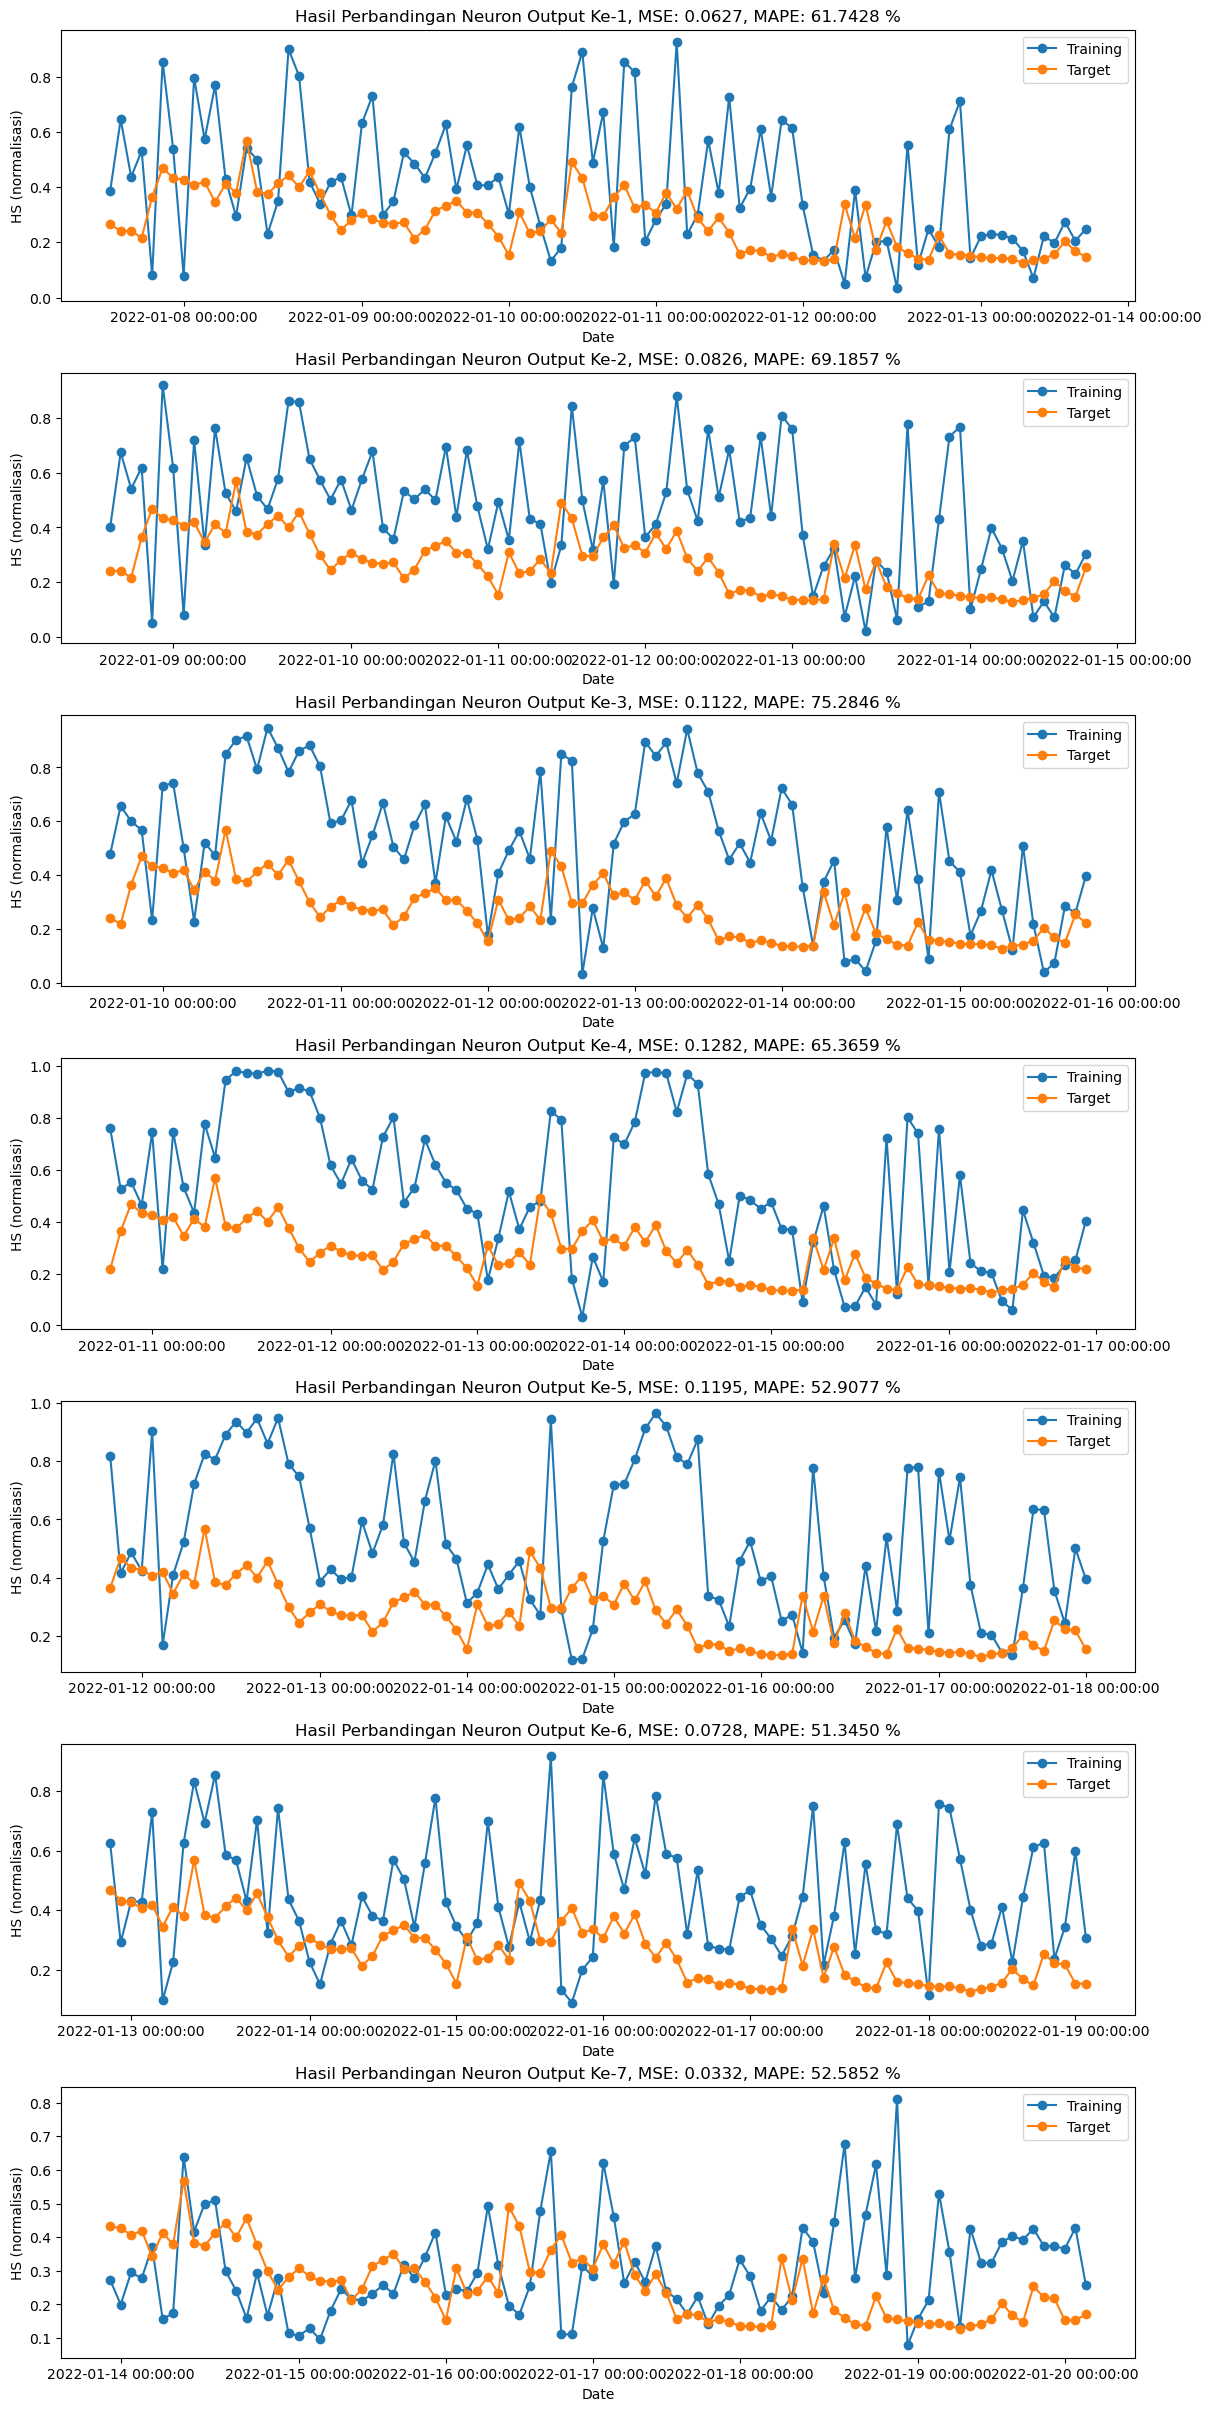

In [84]:
#Perbandingan Data Aktual dan Neuron Output Ke-1 (dari 7 output)
fig, axs = plt.subplots(Y1_Train.shape[1],1,figsize=(12,24),constrained_layout=True)
MAPE_=[]
MSE_ =[]
for i in range(Y1_Train.shape[1]):
    Date_Start= datetime(2022,1,1) + timedelta(days=int(Input_Size/data_nrml_test.shape[1])+i) 
    X_Plot    = np.arange(Date_Start, Date_Start + timedelta(days=Y1_Train.shape[0]), timedelta(days=1)).astype(datetime)
    axs[i].plot(X_Plot,Y1_Train[i],'-o',label='Training')
    axs[i].plot(X_Plot,Y1_Test[i],'-o',label='Target')
    axs[i].legend(loc='upper right')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('HS (normalisasi)')
    axs[i].set_xticklabels(X_Plot, rotation=0)
    MAPE_.append(sum(abs((Y1_Train[i]-Y1_Test[i])/Y1_Train[i])*100)/Y1_Train[i].shape[0])
    MSE_.append(sum((Y1_Train[i]-Y1_Test[i])**2)/Y1_Train[i].shape[0])
    axs[i].set_title(r'Hasil Perbandingan Neuron Output Ke-{}, MSE: {:.4f}, MAPE: {:.4f} %'.format(i+1,MSE_[i],MAPE_[i]))